In [69]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import keras
import tensorflow as tf

In [2]:
import librosa.display

In [99]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [73]:
df = pd.read_csv('balanced_train_segments.csv', sep=', ', skiprows=2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [74]:
df.head(10)

,# YTID,start_seconds,end_seconds,positive_labels
0,--PJHxphWEs,30.0,40.0,"""/m/09x0r,/t/dd00088"""
1,--ZhevVpy1s,50.0,60.0,"""/m/012xff"""
2,--aE2O5G5WE,0.0,10.0,"""/m/03fwl,/m/04rlf,/m/09x0r"""
3,--aO5cdqSAg,30.0,40.0,"""/t/dd00003,/t/dd00005"""
4,--aaILOrkII,200.0,210.0,"""/m/032s66,/m/073cg4"""
5,--cB2ZVjpnA,30.0,40.0,"""/m/01y3hg"""
6,--ekDLDTUXA,30.0,40.0,"""/m/015lz1,/m/07pws3f"""
7,-0DLPzsiXXE,30.0,40.0,"""/m/04rlf,/m/07qwdck"""
8,-0DdlOuIFUI,50.0,60.0,"""/m/0130jx,/m/02jz0l,/m/0838f"""
9,-0FHUc78Gqo,30.0,40.0,"""/m/02w4v,/m/04rlf"""


In [75]:
bark = '/m/05tny_'
door = '/m/02dgv'

In [76]:
barks = df[df.positive_labels.str.contains(bark)]
doors = df[df.positive_labels.str.contains(door)]

In [77]:
barks['positive_labels'] = 'bark'
doors['positive_labels'] = 'door'

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
testdf = pd.concat([barks, doors])
testdf

,# YTID,start_seconds,end_seconds,positive_labels
1669,2mJbGx5D-zA,150.0,160.0,bark
2141,3xCWI_22Z9A,50.0,60.0,bark
2754,5PbIH_kMyis,70.0,80.0,bark
2967,5tOj-p8ANmM,0.0,10.0,bark
3043,64K4SlYR3BU,70.0,80.0,bark
...,...,...,...,...
20494,uQnjkqPH8YU,30.0,40.0,door
20514,uV1r9wUy6_M,30.0,40.0,door
20815,vTn6Vc_KRaY,30.0,40.0,door
21047,wEZ5_0Mm6yI,26.0,36.0,door


In [53]:
barks.to_csv('barks.csv', sep=',', index=False)
doors.to_csv('doors.csv', sep=',', index=False)

In [3]:
y, sr = librosa.load('2mJbGx5D-zA_150.0.wav')

In [4]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[1.44159142e-02, 2.88739577e-02, 1.52743757e-02, ...,
        7.00813660e-04, 7.04820035e-04, 5.50299184e-04],
       [2.95714103e-02, 5.48063740e-02, 3.83833684e-02, ...,
        3.53405601e-04, 7.73790409e-04, 2.78562657e-04],
       [1.91196054e-02, 1.30705042e-02, 1.04619665e-02, ...,
        4.16904746e-04, 2.93548626e-04, 7.81301293e-04],
       ...,
       [1.47295432e-04, 1.33562004e-04, 1.07791529e-04, ...,
        8.87321075e-05, 7.89839396e-05, 2.11771432e-04],
       [3.65266169e-05, 5.28176388e-05, 5.56530176e-05, ...,
        2.59452263e-05, 3.85414023e-05, 9.57394659e-05],
       [2.17359848e-05, 2.40927948e-05, 1.91272502e-05, ...,
        1.57517552e-05, 2.11967927e-05, 9.00495215e-05]], dtype=float32)

In [5]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

In [6]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

In [40]:
len(S[0])

431

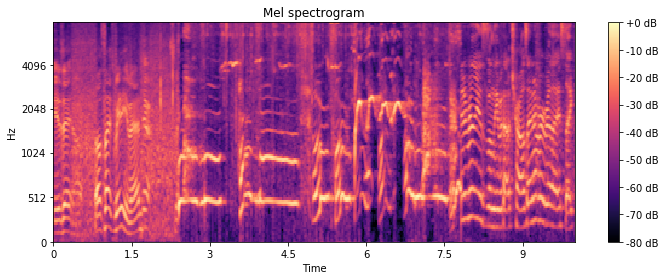

In [24]:
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel spectrogram')
# plt.tight_layout()
# plt.show()

fig = plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

In [25]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

In [104]:
S_ = copy.deepcopy(S)

In [105]:
S_ = np.repeat(S_[:, :, np.newaxis], 3, axis=2)
print(S_.shape)

(128, 431, 3)


In [106]:
image = S_.reshape((1, S_.shape[0], S_.shape[1], S_.shape[2]))
image.shape

(1, 128, 431, 3)

In [107]:
image = preprocess_input(image)

In [112]:
inputtensor = image

In [9]:
model = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 1099s 2us/step


In [113]:
model = VGG16(weights="imagenet",
              include_top=False,
              input_tensor=inputtensor,
              input_shape=(128, 431, 3))
model

ValueError: Unexpectedly found an instance of type `<class 'numpy.ndarray'>`. Expected a symbolic tensor instance.

In [109]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 431, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 431, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 431, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 215, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 215, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 215, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 107, 128)      0         
__________

In [110]:
yhat = model.predict(image)

In [111]:
label = decode_predictions(yhat)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 4, 13, 512)